**Connect to my google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Section A** 

**Read data from dataset file**

In [0]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/Data Mining/HW1/data.csv')

**Show dataset in one table**

In [3]:
data

,id,sex,birth_year,country,region,infection_reason,infected_by,confirmed_date,state
0,1,female,1984.0,China,filtered at airport,visit to Wuhan,NaN,1/20/2020,released
1,2,male,1964.0,Korea,filtered at airport,visit to Wuhan,NaN,1/24/2020,released
2,3,male,1966.0,Korea,capital area,visit to Wuhan,NaN,1/26/2020,released
3,4,male,1964.0,Korea,capital area,visit to Wuhan,NaN,1/27/2020,released
4,5,male,1987.0,Korea,capital area,visit to Wuhan,NaN,1/30/2020,released
...,...,...,...,...,...,...,...,...,...
171,172,female,1997.0,Korea,Gyeongsangbuk-do,NaN,NaN,2/24/2020,isolated
172,173,male,1949.0,Korea,Daegu,NaN,NaN,2/24/2020,deceased
173,174,female,1958.0,Korea,Gyeongsangbuk-do,NaN,NaN,2/24/2020,isolated
174,175,male,1997.0,Korea,Gyeongsangbuk-do,NaN,NaN,2/24/2020,isolated



**Show the head of dataset**

In [4]:
data.head()

,id,sex,birth_year,country,region,infection_reason,infected_by,confirmed_date,state
0,1,female,1984.0,China,filtered at airport,visit to Wuhan,NaN,1/20/2020,released
1,2,male,1964.0,Korea,filtered at airport,visit to Wuhan,NaN,1/24/2020,released
2,3,male,1966.0,Korea,capital area,visit to Wuhan,NaN,1/26/2020,released
3,4,male,1964.0,Korea,capital area,visit to Wuhan,NaN,1/27/2020,released
4,5,male,1987.0,Korea,capital area,visit to Wuhan,NaN,1/30/2020,released


**Show the end of dataset**

In [5]:
data.tail()

,id,sex,birth_year,country,region,infection_reason,infected_by,confirmed_date,state
171,172,female,1997.0,Korea,Gyeongsangbuk-do,NaN,NaN,2/24/2020,isolated
172,173,male,1949.0,Korea,Daegu,NaN,NaN,2/24/2020,deceased
173,174,female,1958.0,Korea,Gyeongsangbuk-do,NaN,NaN,2/24/2020,isolated
174,175,male,1997.0,Korea,Gyeongsangbuk-do,NaN,NaN,2/24/2020,isolated
175,176,female,1950.0,Korea,capital area,NaN,NaN,2/24/2020,isolated


**Section B** 

**Show the shape of dataset**


This dataset contains 176 data which have nine attributes for each data


In [6]:
data.shape

(176, 9)

**With this instruction we could find the information of dataset**

 it shows the name of each attribute with the type of them and etc.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 9 columns):
id                  176 non-null int64
sex                 176 non-null object
birth_year          166 non-null float64
country             176 non-null object
region              166 non-null object
infection_reason    95 non-null object
infected_by         42 non-null float64
confirmed_date      176 non-null object
state               176 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 12.5+ KB


**Section C** 

In [8]:
data[['birth_year']].max()

birth_year    2009.0
dtype: float64

In [9]:
data[['birth_year']].mean()

birth_year    1973.385542
dtype: float64

In [10]:
data[['birth_year']].std()

birth_year    17.032825
dtype: float64

**Section D** 

Show the number of filed in 'region' column

In [11]:
data.region.count()

166

**Section E**

*As we know in section B, we have 176 entries and based on info about some columns like birth year and region and infection reason, etc. have less than 176 non-null data. So we have null cells. There are 5 known ways to handle null cells. one way is deleting the whole row and another is replacing it with mean so that it doesn't affect the results in a wrong way or using methods that support missing value or predict the missing values etc. we implement two of these strategies.*

In [12]:
data['birth_year'].isnull().sum()

10

In [13]:
data['birth_year'].mean()

1973.3855421686746

In [14]:
import numpy as np
data['birth_year'].replace(np.NaN,data['birth_year'].mean()).head(20)

0     1984.0
1     1964.0
2     1966.0
3     1964.0
4     1987.0
5     1964.0
6     1991.0
7     1957.0
8     1992.0
9     1966.0
10    1995.0
11    1971.0
12    1992.0
13    1980.0
14    1977.0
15    1977.0
16    1982.0
17    1999.0
18    1983.0
19    1978.0
Name: birth_year, dtype: float64

**Section F**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89e236eeb8>]],
      dtype=object)

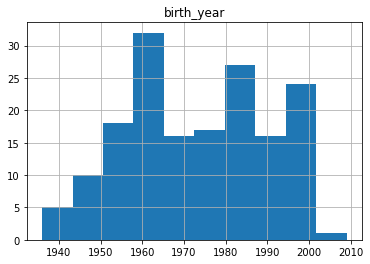

In [15]:
import matplotlib.pyplot as plt
data.hist(column='birth_year')

**Section G**

In this data set, only column birth_year is a numeric pillar and we only need to check that outlier has taken place.

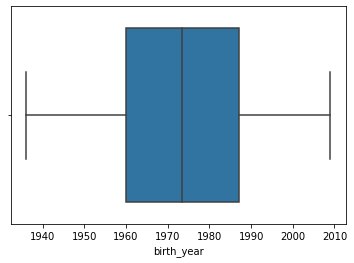

In [16]:
import seaborn as sns
sns.boxplot(x=data['birth_year'])

However, based on section F, we may suppose people born between 2000 and 2010 or 1940 and 1950 are outliers because they are so few. In larger scales, we should delete or replace these from the dataset so that we get better performance.

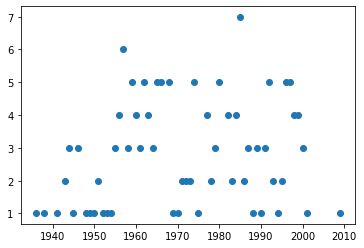

In [17]:
import matplotlib.pyplot as plt
from collections import Counter

data_dict = dict(Counter(data['birth_year']))
data_lists = sorted(data_dict.items()) 
x,y = zip(*data_lists)
plt.scatter(x,y)
plt.show()